In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

## p.130

In [2]:
df = pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

shapiro(df)

ShapiroResult(statistic=0.9331596493721008, pvalue=0.47968029975891113)

In [4]:
t_result = stats.ttest_1samp(df, 76.7)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("t 통계량 : {}, p-value : {}".format(t, p))

t 통계량 : [0.864], p-value : [0.41]


## p.131

1. 가설 수립 및 유의수준 설정
- 귀무가설 : 평균은 78.0이다.
- 대립가설 : 평균은 78.0이 아니다.
- 유의수준 = 0.05

In [7]:
# df 직접 입력
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 정규성 검정
shapiro(df)

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

In [6]:
t_result = stats.ttest_1samp(df, 78.0)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1 Sample t-test")
print("t 통계량 : {}, p-value : {}".format(t, p))

1 Sample t-test
t 통계량 : [3.379], p-value : [0.008]


## p.137 - p.138

In [8]:
df1 = pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
df2 = pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})

# 정규성 검정
shapiro(df1)

ShapiroResult(statistic=0.9094840288162231, pvalue=0.06230909377336502)

In [9]:
shapiro(df2)

ShapiroResult(statistic=0.8978105783462524, pvalue=0.03752673789858818)

In [10]:
# 등분산성 검정
stats.levene(df1['sample'],df2['sample'])
#stats.bartlett(df1['sample'], df2['sample'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [11]:
t_result = stats.ttest_ind(df1, df2, equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: [-3.122] 
p-value: [0.003] 


## p.140 - p.141

In [12]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [13]:
print( "Paired t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

Paired t-test 
t검정통계량: [-5.324] 
p-value: [0.] 


## p.146

In [14]:
count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [15]:
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:1.400
p:0.161


In [16]:
count = 150
n_obs = 1000
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [17]:
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:4.428
p:0.000


## p.149 - p.150

In [18]:
count = np.array([4, 1])
nobs = np.array([1000, 1200])

stat, pval = proportions_ztest(count, nobs)
print("2 proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 proportion test
z:1.553
p:0.120


In [19]:
count = np.array([40, 10])
nobs = np.array([10000, 12000])

stat, pval = proportions_ztest(count, nobs)
print("2 proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 proportion test
z:4.911
p:0.000


## p. 157

In [20]:
df = pd.DataFrame({'HSG':[270, 260, 236, 234], 'SS':[228, 285, 225, 262],
                  'SPA':[277,284,231,208]})

chi, pval, dof, expected = stats.chi2_contingency(df)

In [21]:
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq: 13.366
p: 0.038
degree of freedom: 6
expected value: 
[[258.333 258.333 258.333]
 [276.333 276.333 276.333]
 [230.667 230.667 230.667]
 [234.667 234.667 234.667]]


## p.159

In [22]:
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})
chi, pval, dof, expected = stats.chi2_contingency(df)

In [23]:
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree of freedom: 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


## p.165

<AxesSubplot:>

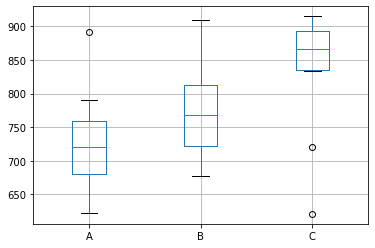

In [24]:
df = pd.DataFrame({'A':[892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                   'B':[721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C':[621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})

df.boxplot(['A', 'B', 'C'])

In [28]:
df

,A,B,C
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894
5,790,790,834
6,720,711,841
7,670,790,912
8,690,745,845
9,771,891,889


In [25]:
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.263
p-value : 0.025


## p.172

In [26]:
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:0.989
p-value:0.000


## p.174

In [27]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000
